# Análisis de datos de los dramas coreanos

In [491]:
import pandas as pd
from rich import print

In [492]:
%run "../pandas_extensions/missing.py"

C:\Users\gfran\Documents\personal\analysis-k-dramas\pandas_extensions\missing.py:7: UserWarning: registration of accessor <class '__main__.MissingData'> under name 'missing_data' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("missing_data")


In [493]:
k_dramas: pd.DataFrame = pd.read_csv('./../data/csv/korean_drama.csv')
k_dramas.set_index('kdrama_id', inplace=True)
k_dramas.head()

,drama_name,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
kdrama_id,,,,,,,,,,,,,,,,
661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547


In [494]:
print(f'k-dramas has {k_dramas.shape[0]} rows and {k_dramas.shape[1]} columns')

k-dramas has 1752 rows and 16 columns

In [495]:
print(f'The columns of k-dramas dataframe are {list(k_dramas.columns)}')

The columns of k-dramas dataframe are ['drama_name', 'year', 'director', 'screenwriter', 'country', 'type', 
'tot_eps', 'duration', 'start_dt', 'end_dt', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop']

## Análisis Exploratorio de Datos Faltantes

Se puede ver que la mayoría de columnas no tienen ningún valor faltante.

Pero las dos columnas con mayor número de valores faltantes son: 'director' y 'screenwriter'. La cantidad de valores faltantes en estas dos columnas son similares, así que más adelante se analizarán si tienen algún tipo de relación.

De allí la columna con más valores faltantes es 'org_net', con aproximadamente la mitad de valores faltantes que las dos anteriores.

Luego se encuentra la columna 'aired_on', con nuevamente la mitad de valores faltantes que la anterior.

En el caso de la columnas 'synopsis' pasa algo similar

Y finalmente, la columna con menos valores faltantes es 'duration', con solo 24 valores faltantes. Así que las filas con valores faltantes en esta columna es posible que se puedan eliminar.

### Valores faltantes

In [496]:
k_dramas.missing_data.total_count_na

2341

In [497]:
k_dramas.missing_data.total_count_na_percentage

8.3511700913242

In [498]:
k_dramas.missing_data.total_count_not_na

25691

In [499]:
k_dramas.missing_data.total_count_not_na_percentage

91.6488299086758

-----

### Valores faltantes por columna

In [500]:
k_dramas.missing_data.count_na_per_column

drama_name        0
year              0
director        716
screenwriter    793
country           0
type              0
tot_eps           0
duration         24
start_dt          0
end_dt            0
aired_on        232
org_net         408
content_rt        0
synopsis        168
rank              0
pop               0
dtype: int64

In [501]:
k_dramas.missing_data.count_na_per_column_percentage

drama_name       0.000000
year             0.000000
director        40.867580
screenwriter    45.262557
country          0.000000
type             0.000000
tot_eps          0.000000
duration         1.369863
start_dt         0.000000
end_dt           0.000000
aired_on        13.242009
org_net         23.287671
content_rt       0.000000
synopsis         9.589041
rank             0.000000
pop              0.000000
dtype: float64

In [502]:
k_dramas.missing_data.count_na_per_column.sort_values(ascending=False)

screenwriter    793
director        716
org_net         408
aired_on        232
synopsis        168
duration         24
drama_name        0
year              0
country           0
type              0
tot_eps           0
start_dt          0
end_dt            0
content_rt        0
rank              0
pop               0
dtype: int64

In [503]:
k_dramas.missing_data.count_na_per_column_percentage.sort_values(ascending=False)

screenwriter    45.262557
director        40.867580
org_net         23.287671
aired_on        13.242009
synopsis         9.589041
duration         1.369863
drama_name       0.000000
year             0.000000
country          0.000000
type             0.000000
tot_eps          0.000000
start_dt         0.000000
end_dt           0.000000
content_rt       0.000000
rank             0.000000
pop              0.000000
dtype: float64

In [504]:
k_dramas.missing_data.na_count_and_percentage_per("column")

,count,percentage
drama_name,0,0.000000
year,0,0.000000
director,716,40.867580
screenwriter,793,45.262557
country,0,0.000000
type,0,0.000000
tot_eps,0,0.000000
duration,24,1.369863
start_dt,0,0.000000
end_dt,0,0.000000


In [505]:
k_dramas.missing_data.na_count_and_percentage_per("column").sort_values(by="count", ascending=False)

,count,percentage
screenwriter,793,45.262557
director,716,40.867580
org_net,408,23.287671
aired_on,232,13.242009
synopsis,168,9.589041
duration,24,1.369863
drama_name,0,0.000000
year,0,0.000000
country,0,0.000000
type,0,0.000000


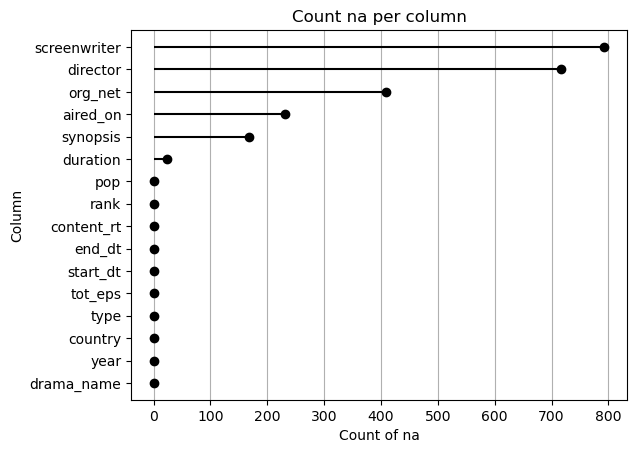

In [506]:
k_dramas.missing_data.plot_of_na_count_per_column()

In [507]:
k_dramas.missing_data.coincidence_count_na_per("column")

0      10
24      1
168     1
232     1
408     1
716     1
793     1
Name: count, dtype: int64

In [508]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("column")

,count,percentage
0,10,62.50
24,1,6.25
168,1,6.25
232,1,6.25
408,1,6.25
716,1,6.25
793,1,6.25


In [509]:
k_dramas.missing_data.columns_with_na

Index(['director', 'screenwriter', 'duration', 'aired_on', 'org_net',
       'synopsis'],
      dtype='object')

In [510]:
k_dramas.missing_data.columns_without_na

Index(['drama_name', 'year', 'country', 'type', 'tot_eps', 'start_dt',
       'end_dt', 'content_rt', 'rank', 'pop'],
      dtype='object')

-----------

### Valores faltantes por fila

In [511]:
k_dramas.missing_data.count_na_per_row

kdrama_id
661d4193916c4e71a2c70473ab11e9e8    2
5ffcbeaa17114714af1959129984274c    1
65075cb9c1a54be4a441cee6f16c9fdf    0
df0f0ac4b3ff4b15afa26f5a7a53a328    3
04c1fe41948e464fb440001831d74d41    0
                                   ..
e8c09f0f7d0d4b75a4642eb06d76d811    0
1e7f7f2fa45d4240b8bb585ca13040f0    0
142a09741fdd4daa878d6ae007201e43    0
9170c31a02014b56bb4cec2105086f00    0
c19353bdbc7a43ae98b27db202e7c908    5
Length: 1752, dtype: int64

In [512]:
k_dramas.missing_data.count_na_per_row_percentage

kdrama_id
661d4193916c4e71a2c70473ab11e9e8    12.50
5ffcbeaa17114714af1959129984274c     6.25
65075cb9c1a54be4a441cee6f16c9fdf     0.00
df0f0ac4b3ff4b15afa26f5a7a53a328    18.75
04c1fe41948e464fb440001831d74d41     0.00
                                    ...  
e8c09f0f7d0d4b75a4642eb06d76d811     0.00
1e7f7f2fa45d4240b8bb585ca13040f0     0.00
142a09741fdd4daa878d6ae007201e43     0.00
9170c31a02014b56bb4cec2105086f00     0.00
c19353bdbc7a43ae98b27db202e7c908    31.25
Length: 1752, dtype: float64

In [513]:
k_dramas.missing_data.count_na_per_row.sort_values(ascending=False)

kdrama_id
c19353bdbc7a43ae98b27db202e7c908    5
60312b4a037647e09ea87d370cd14d00    5
2027a2b550334f7da7f1e986042aa28b    5
d19df885740645e7886921fd44aeeb99    5
71756ef058b24c239663f29a97439683    5
                                   ..
05842d24f1db40c99a1cfe7f35a564ba    0
2f4e0303ef434cdf9f5ff951cc4f5e74    0
056a9d09a3e64ae1ae175722ec8a8e7a    0
bcdb2033506d40f084b87c4be590334f    0
45edc1b35b37412b90bcd5afff792b85    0
Length: 1752, dtype: int64

In [514]:
k_dramas.missing_data.count_na_per_row_percentage.sort_values(ascending=False)

kdrama_id
c19353bdbc7a43ae98b27db202e7c908    31.25
60312b4a037647e09ea87d370cd14d00    31.25
2027a2b550334f7da7f1e986042aa28b    31.25
d19df885740645e7886921fd44aeeb99    31.25
71756ef058b24c239663f29a97439683    31.25
                                    ...  
05842d24f1db40c99a1cfe7f35a564ba     0.00
2f4e0303ef434cdf9f5ff951cc4f5e74     0.00
056a9d09a3e64ae1ae175722ec8a8e7a     0.00
bcdb2033506d40f084b87c4be590334f     0.00
45edc1b35b37412b90bcd5afff792b85     0.00
Length: 1752, dtype: float64

In [515]:
k_dramas.missing_data.na_count_and_percentage_per("row")

,count,percentage
kdrama_id,,
661d4193916c4e71a2c70473ab11e9e8,2,12.50
5ffcbeaa17114714af1959129984274c,1,6.25
65075cb9c1a54be4a441cee6f16c9fdf,0,0.00
df0f0ac4b3ff4b15afa26f5a7a53a328,3,18.75
04c1fe41948e464fb440001831d74d41,0,0.00
...,...,...
e8c09f0f7d0d4b75a4642eb06d76d811,0,0.00
1e7f7f2fa45d4240b8bb585ca13040f0,0,0.00
142a09741fdd4daa878d6ae007201e43,0,0.00


In [516]:
k_dramas.missing_data.na_count_and_percentage_per("row").sort_values(by="count", ascending=False)

,count,percentage
kdrama_id,,
c19353bdbc7a43ae98b27db202e7c908,5,31.25
60312b4a037647e09ea87d370cd14d00,5,31.25
2027a2b550334f7da7f1e986042aa28b,5,31.25
d19df885740645e7886921fd44aeeb99,5,31.25
71756ef058b24c239663f29a97439683,5,31.25
...,...,...
05842d24f1db40c99a1cfe7f35a564ba,0,0.00
2f4e0303ef434cdf9f5ff951cc4f5e74,0,0.00
056a9d09a3e64ae1ae175722ec8a8e7a,0,0.00


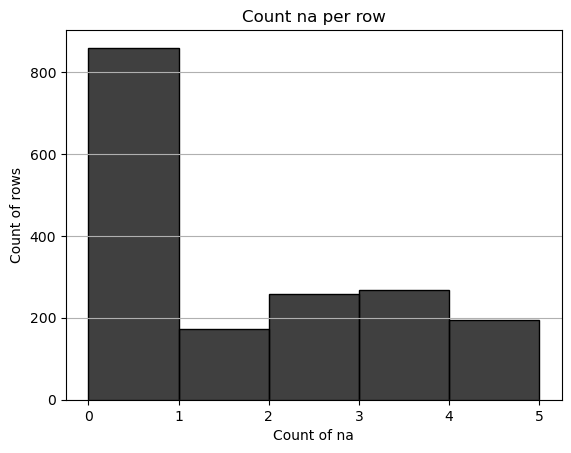

In [517]:
k_dramas.missing_data.histplot_of_na_count_per_row()

In [518]:
k_dramas.missing_data.coincidence_count_na_per("row")

0    859
1    173
2    257
3    268
4    125
5     70
Name: count, dtype: int64

In [519]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("row")

,count,percentage
0,859,49.029680
1,173,9.874429
2,257,14.668950
3,268,15.296804
4,125,7.134703
5,70,3.995434


------

### Valores faltantes por intervalos

In [520]:
column = k_dramas.missing_data.columns_with_na[1]
column

'screenwriter'

In [521]:
interval = 10

In [522]:
k_dramas.missing_data.na_count_by_intervals(interval, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,4,6,40.0,60.0
1,6,4,60.0,40.0
2,3,7,30.0,70.0
3,3,7,30.0,70.0
4,2,8,20.0,80.0
...,...,...,...,...
171,3,7,30.0,70.0
172,2,8,20.0,80.0
173,4,6,40.0,60.0


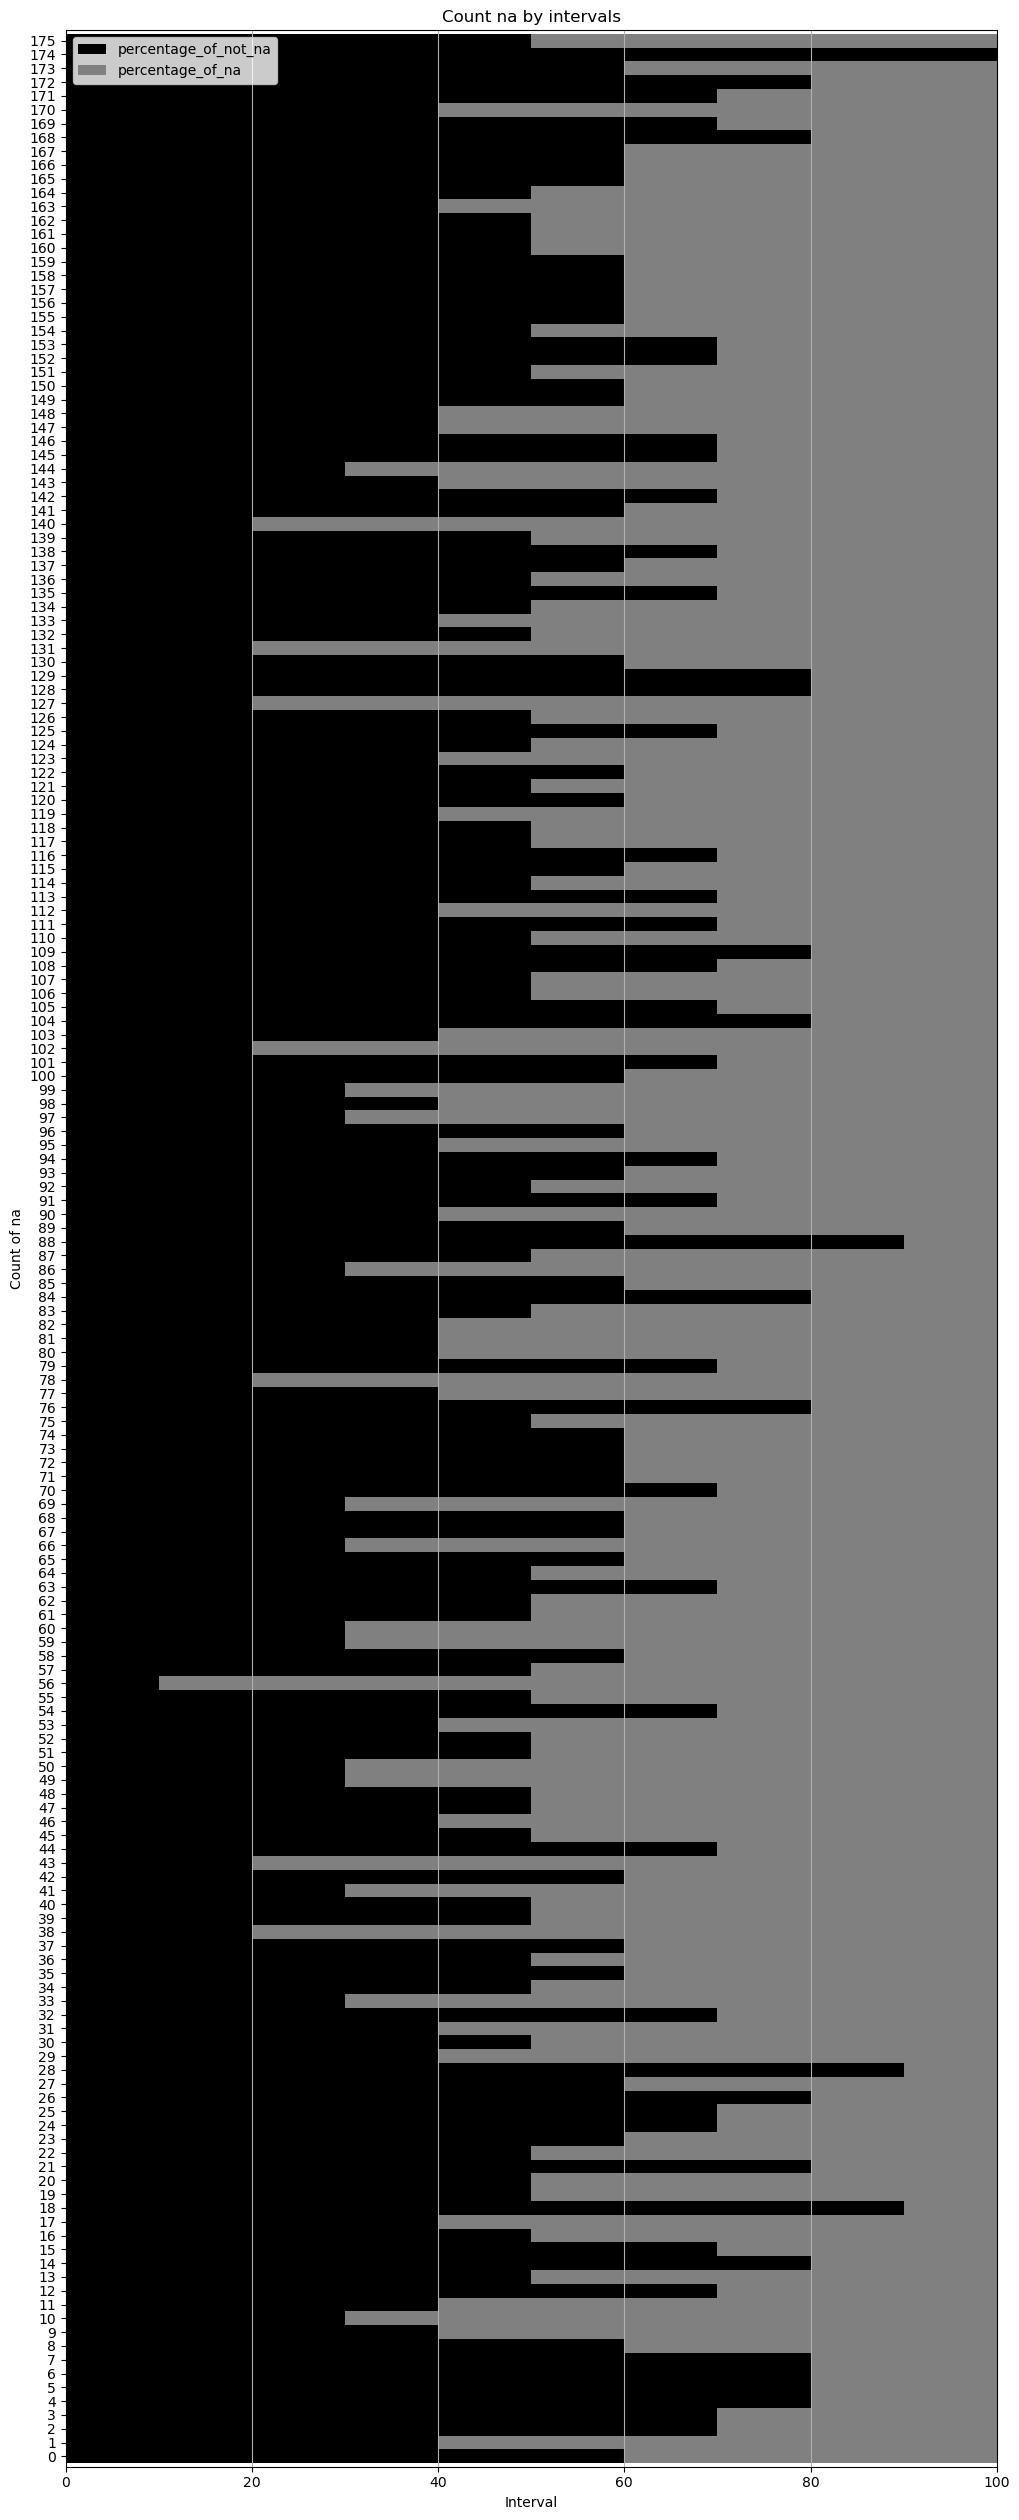

In [523]:
k_dramas.missing_data.percentage_of_not_na_vs_percentage_of_na_plot(interval, column, figsize=(10, 25))

In [524]:
k_dramas.missing_data.na_count_by_intervals(interval, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
56,9,1,90.0,10.0
131,8,2,80.0,20.0
78,8,2,80.0,20.0
43,8,2,80.0,20.0
140,8,2,80.0,20.0
...,...,...,...,...
88,1,9,10.0,90.0
28,1,9,10.0,90.0
18,1,9,10.0,90.0


-----

In [525]:
bins = 30

In [526]:
k_dramas.missing_data.na_count_by_bins(bins, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,20,39,33.898305,66.101695
1,26,32,44.827586,55.172414
2,22,37,37.288136,62.711864
3,22,36,37.931034,62.068966
4,17,41,29.310345,70.689655
5,32,27,54.237288,45.762712
6,29,29,50.000000,50.000000
7,33,25,56.896552,43.103448
8,33,26,55.932203,44.067797


In [527]:
k_dramas.missing_data.na_count_by_bins(bins, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
8,33,26,55.932203,44.067797
7,33,25,56.896552,43.103448
5,32,27,54.237288,45.762712
10,32,27,54.237288,45.762712
13,31,28,52.542373,47.457627
9,31,27,53.448276,46.551724
24,30,29,50.847458,49.152542
16,30,29,50.847458,49.152542
21,30,29,50.847458,49.152542


-----

In [528]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column)

,num_in_section,value
0,1,na
1,2,not_na
2,1,na
3,1,not_na
4,1,na
...,...,...
820,1,na
821,1,not_na
822,2,na
823,12,not_na


In [529]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by="num_in_section", ascending=False)

,num_in_section,value
823,12,not_na
417,11,not_na
25,11,not_na
81,11,not_na
414,9,na
...,...,...
356,1,na
352,1,na
349,1,not_na
348,1,na


In [530]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by=["value", "num_in_section"], ascending=False)

,num_in_section,value
823,12,not_na
25,11,not_na
81,11,not_na
417,11,not_na
19,9,not_na
...,...,...
814,1,na
816,1,na
818,1,na
820,1,na
